In [71]:
# data visualization and graphical plotting library
import matplotlib
import matplotlib . pyplot as plt
# library mathematic & statistic 
import numpy as np
from datetime import datetime
# my library to generate data under GMM models
from mylib.sampling_gaussian_mixture_model import sampling_gaussian_mixture_model
from mylib.Hierarchical_Clustering_Mixture_Model import Hierarchical_Mixture_Model
# library for machine learning
from sklearn.model_selection import train_test_split

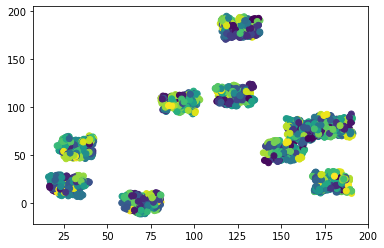

In [74]:
n_components      = 500                 # number of components to generate 
dim               = 2                 # dimension of dataset 
k                 = n_components      # composents of F function 
m                 = 10               # composents of G function
n_samples         = 4000              # numbers of samples of data 
option            = 'random_weights'  # option probability of weights 
global_components =   10              # global components of data to generate 

sgmm = sampling_gaussian_mixture_model(n_components ,dim )

SGCMM = sgmm.fit(n_samples , edge =global_components)
X      = SGCMM.X
y = SGCMM.labels
sgmm.visualization_samling_data_GMM(plot_spherical_cluster = ' spherical cluster ')

In [16]:
y.shape

(4000,)

In [20]:
edge =2
lst =100
pas = 100 
noise =10.
sgmm.plot_cluster_animation_parametre(edge ,lst , pas, noise)

interactive(children=(Dropdown(description='Method:', index=1, options=('random_weights', 'eqaul_weights'), va…

In [75]:
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.20, random_state=42)

In [24]:
y_train.shape

(3200,)

# Performance of Hierarchical Clustering Mixture Model 

# _____________________________________________________________________________

# Performance of HCMM for clusters data Get by GMM (approximation data)

In [34]:
start_time = datetime.now()
m = 10
HCMM = Hierarchical_Mixture_Model(k,m)
hcmm = HCMM.fit(X_train)

labels_test= HCMM.predict(X_test)

labels_train= HCMM.predict(X_train)


end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:14.024001


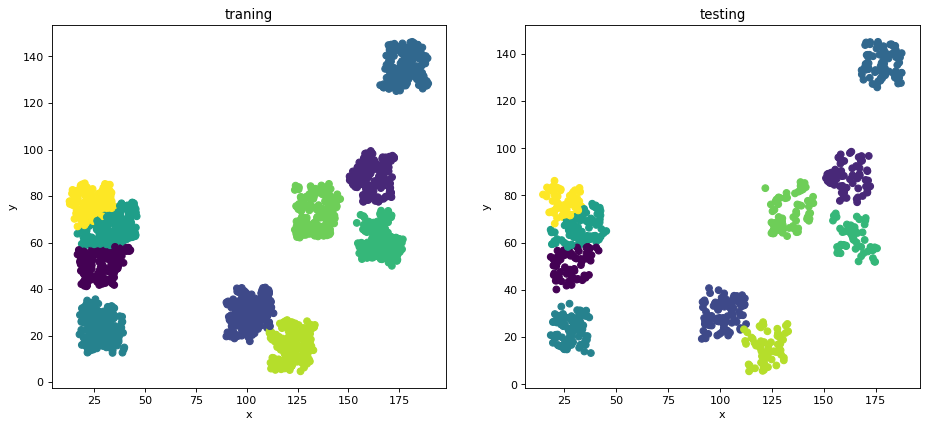

In [35]:
fig = plt.figure(figsize=(14, 6), dpi=80)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(X_train[:,0],X_train[:,1] , c = labels_train )
ax2.scatter(X_test[:,0],X_test[:,1] , c   = labels_test  )

ax1.set_title('traning')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax2.set_title('testing')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
plt.show()

# Parameters of G function

In [36]:
mean = hcmm.mean_G
mean

{0: array([27.85603147, 50.98954583]),
 1: array([160.6961284 ,  87.69214202]),
 2: array([101.95678609,  30.69059609]),
 3: array([178.30614256, 135.52877882]),
 4: array([27.37197396, 24.11979028]),
 5: array([33.38500009, 65.85313469]),
 6: array([165.54776835,  60.68984829]),
 7: array([134.46127886,  72.13853054]),
 8: array([122.19911645,  15.58851814]),
 9: array([24.41000604, 76.86711675])}

In [37]:
cov = hcmm.cov_G
cov

{0: array([[40.78857077, 10.05409904],
        [10.05409904, 26.89083573]]),
 1: array([[32.56217422,  4.77050184],
        [ 4.77050184, 29.2220429 ]]),
 2: array([[36.17742771,  8.80792258],
        [ 8.80792258, 27.091081  ]]),
 3: array([[31.42404886,  2.48722133],
        [ 2.48722133, 32.43266514]]),
 4: array([[26.6287996 , -2.66022921],
        [-2.66022921, 30.55639453]]),
 5: array([[38.20750799, 11.25214669],
        [11.25214669, 21.5080036 ]]),
 6: array([[31.26806292, -5.23585691],
        [-5.23585691, 26.24682117]]),
 7: array([[35.08685953,  6.19403745],
        [ 6.19403745, 42.73211474]]),
 8: array([[32.13513253,  4.81898087],
        [ 4.81898087, 29.99216468]]),
 9: array([[31.64441913, -0.81657765],
        [-0.81657765, 22.26765324]])}

(3200, 3200)

In [38]:
weights =hcmm.weights_G
weights

{0: 0.08912691694861485,
 1: 0.11614623693306218,
 2: 0.09788833724819965,
 3: 0.08848863566610102,
 4: 0.06880123365288184,
 5: 0.10489273780791337,
 6: 0.07106384729401732,
 7: 0.14482329171741107,
 8: 0.1564981368115565,
 9: 0.06227062592024223}

# Parameters of data


In [76]:
mean_F   = SGCMM.means
cov_F    = np.asarray(SGCMM.cov)
weight_F = np.asarray(SGCMM.weights)

In [48]:
len(cov)

500

# Performance of HCMM for data from GMM law (real data)

In [90]:
start_time = datetime.now()

HCMM = Hierarchical_Mixture_Model(k, m, mean_F = mean_F, cov_F= cov_F, weight_F= weight_F )
hcmm = HCMM.fit(X_train)

labels_test= HCMM.predict(X_test)

labels_train= HCMM.predict(X_train)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:02.071482


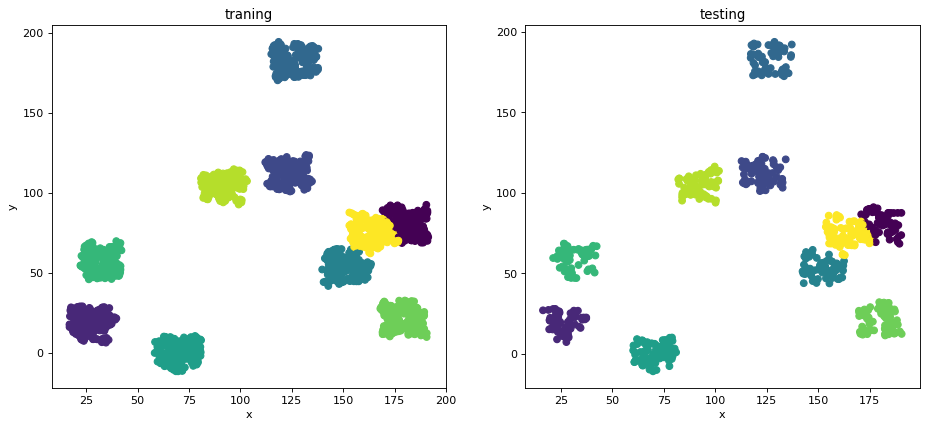

In [78]:
fig = plt.figure(figsize=(14, 6), dpi=80)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(X_train[:,0],X_train[:,1] , c = labels_train )
ax2.scatter(X_test[:,0],X_test[:,1] , c   = labels_test  )

ax1.set_title('traning')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax2.set_title('testing')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
plt.show()